In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from scipy.integrate import solve_ivp
import datetime

In [12]:
g = -10 # vectorial gravity
N = 3 # number of particles in the system
b = 0.1 # air viscosity
def newtonian_dynamic_2D(t, η):
    # η = [X[0], Y[0], Vx[0], Vy[0], ..., X[N], Y[N], Vx[N], Vy[N]]
    dηdt = np.zeros(4*N, dtype=float)
    for i in range(0, N):
        dηdt[4*i+0] = η[4*i+2]
        dηdt[4*i+1] = η[4*i+3]

        if η[4*i+0] > 1:
            dηdt[4*i+2] += -9999
        elif η[4*i+0] < -1:
            dηdt[4*i+2] += 9999
        else:
            dηdt[4*i+2] += -b*η[4*i+2]

        if η[4*i+1] > 0:
            dηdt[4*i+3] += g - b*η[4*i+3]
        else:
            dηdt[4*i+3] += 9999
    return dηdt

In [19]:
η0 = [] # Condições iniciais
for i in range(0, N):
    η0.append(np.random.uniform(-1,1))
    η0.append(np.random.uniform(1,3))
    η0.append(np.random.uniform(-1,1))
    η0.append(np.random.uniform(-1,1))

t_init = 0 # Tempo inicial da simulacao em unidades de sei la, bananas
t_final = 5 # Tempo final da simulacao em unidades de sei la, bananas
t_len = 1000 # Time step de um ponto ao outro
#----------

t_vec = np.linspace(t_init, t_final, t_len)
sol = solve_ivp(newtonian_dynamic_2D, [t_init, t_final], η0, method='RK45', t_eval=t_vec, rtol=1e-8)

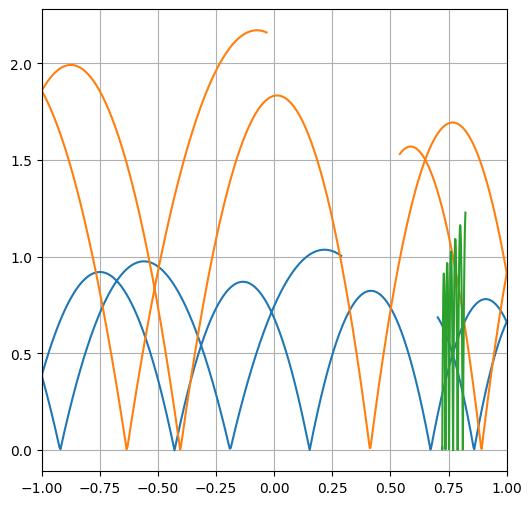

In [20]:
X, Y = [], []
for i in range(0, N):
    X.append(sol.y[4*i+0])
    Y.append(sol.y[4*i+1])
X_min, X_max = np.min(np.array(X).flatten()), np.max(np.array(X).flatten())
Y_min, Y_max = np.min(np.array(Y).flatten()), np.max(np.array(Y).flatten())

fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(X)):
    ax.plot(X[i],Y[i])
    ax.set_xlim(-1,1)
ax.grid(True)

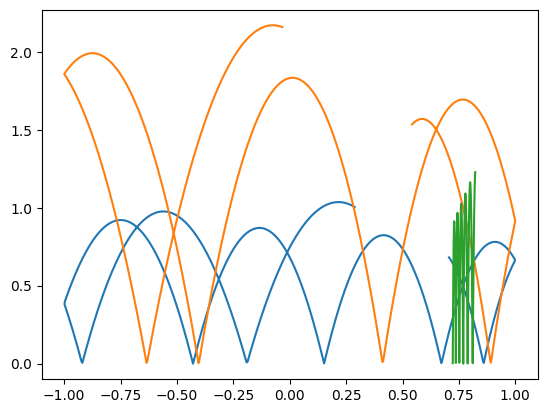

In [21]:
fig = plt.figure()

canvas = []
for i in range(0, N):
    canvas.append(plt.plot([], [])[0])

lim_tol = 0.1
plt.xlim(X_min - lim_tol, X_max + lim_tol)
plt.ylim(Y_min - lim_tol, Y_max + lim_tol)

metadata = dict(title='Bouncing_Balls', artist='condekiq')
writer = PillowWriter(fps=30, metadata=metadata)

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
with writer.saving(fig, timestamp+".gif", 100):
    for i in np.arange(t_len):
        for j in range(0, N):
            canvas[j].set_data(X[j][:i], Y[j][:i])
        writer.grab_frame()